In [4]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import os.path
from sklearn.feature_extraction.text import CountVectorizer
import pickle as pkl
from time import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import ParameterGrid
from random import sample
from matplotlib import pyplot as plt
from scipy import stats
import random

In [6]:
def loading_lda(num_topics,max_features,max_df,min_df):
    term_freq_df_path = 'data/tfVectorizer_topics={}_maxFeatures={}_maxDf={}_minDf={}.csv'.format(num_topics,max_features,max_df,min_df)
    if os.path.exists(term_freq_df_path):
        term_freq_df = pd.read_csv(term_freq_df_path)
        
    voc_list = list(term_freq_df.columns)
    all_idx = [i for i in range(len(voc_list))]
    food_idx = [idx for idx in range(len(voc_list)) if voc_list[idx] in food]
    activity_idx = [idx for idx in range(len(voc_list)) if voc_list[idx] in activity]
    irrelevant_idx = list(filter(lambda x: x not in food_idx + activity_idx,all_idx))
    empirical_food_ts_list = []
    empirical_activity_ts_list = []
    
    for i in range(num_topics):
        food_ts_list = []
        food_p_list = []
        activity_ts_list = []
        activity_p_list = []
        all_prob = term_freq_df.iloc[i,:]
        food_prob = all_prob[food_idx].tolist()
        activity_prob = all_prob[activity_idx].tolist()
        irrelevant_prob = all_prob[irrelevant_idx].tolist()
        food_ts,food_p = stats.ks_2samp(food_prob, irrelevant_prob)
        activity_ts,activity_p = stats.ks_2samp(activity_prob, irrelevant_prob)
        food_ts_list.append(food_ts)
        food_p_list.append(food_p)
        activity_ts_list.append(activity_ts)
        activity_p_list.append(activity_p)
        
        count = 20000
        while count != 0:
            count -= 1
            all_prob = np.random.permutation(all_prob)
            food_prob = all_prob[food_idx].tolist()
            activity_prob = all_prob[activity_idx].tolist()
            irrelevant_prob = all_prob[irrelevant_idx].tolist()
            food_ts,food_p = stats.ks_2samp(food_prob, irrelevant_prob)
            activity_ts,activity_p = stats.ks_2samp(activity_prob, irrelevant_prob)
            
            food_ts_list.append(food_ts)
            food_p_list.append(food_p)
            activity_ts_list.append(activity_ts)
            activity_p_list.append(activity_p)
            
        empirical_food_ts = len([i for i in food_ts_list[1:] if i > food_ts_list[0]])/20000
        empirical_activity_ts = len([i for i in activity_ts_list[1:] if i > activity_ts_list[0]])/20000
        empirical_food_ts_list.append(empirical_food_ts)
        empirical_activity_ts_list.append(empirical_activity_ts)
    return empirical_food_ts_list,empirical_activity_ts_list



if __name__ == '__main__':
    food = list(pkl.load(open("data/food.pickle","rb")))
    food = [i.strip() for i in food]
    activity = list(pkl.load(open("data/activity.pickle","rb")))
    activity = [i.strip() for i in activity]
    
    print(loading_lda(50,12000,0.6,1))
    print(loading_lda(50,16000,0.6,1))
    print(loading_lda(125,20000,0.5,100))
    print(loading_lda(125,25000,0.5,100))


In [24]:
LDA50_12000 = ([0.0, 0.0013, 0.00095, 0.0001, 0.0018, 0.0003, 0.00095, 0.0014, 0.00265, 0.00045, 0.0238, 0.00015, 0.00045, 0.0009, 0.00035, 0.00035, 0.00015, 0.0015, 0.0007, 0.00015, 0.0003, 0.00025, 0.00025, 0.00125, 0.00045, 0.00345, 0.0016, 0.001, 0.0023, 0.01215, 0.00455, 0.00035, 0.0, 0.00285, 0.0004, 0.00015, 0.0003, 0.004, 0.0011, 0.0014, 0.0002, 0.00015, 0.00065, 0.00125, 0.0017, 0.00065, 0.00025, 0.00035, 0.0003, 0.0037], [0.0, 0.0025, 0.0004, 5e-05, 0.00205, 0.0002, 5e-05, 0.0001, 0.00015, 0.00015, 0.0, 0.00025, 0.00185, 0.0001, 0.0006, 0.0, 0.0016, 0.002, 0.0, 5e-05, 0.0001, 0.0002, 0.0004, 5e-05, 0.00015, 0.0003, 0.0004, 0.00015, 0.00055, 0.00025, 0.00025, 0.0001, 5e-05, 0.0, 0.00045, 5e-05, 0.00045, 0.0001, 5e-05, 0.0, 0.0003, 0.0, 5e-05, 0.0, 5e-05, 0.0001, 0.0003, 0.00025, 0.00035, 5e-05])
LDA50_16000 = ([0.0, 0.0, 0.0, 0.0, 0.0003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5e-05, 5e-05, 0.0, 0.0, 0.0, 0.0, 5e-05, 0.0], [0.0, 0.0, 0.00015, 0.0, 0.0001, 0.0, 0.0, 5e-05, 5e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0, 0.0, 5e-05, 0.0, 0.0, 5e-05, 0.0002, 5e-05, 5e-05, 0.0, 0.0, 0.0, 0.00015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0])
LDA125_20000 = ([0.28605, 0.66355, 0.20285, 0.08245, 0.28285, 0.35575, 0.2721, 0.9457, 0.66235, 0.3561, 0.03325, 0.78115, 0.30955, 0.5871, 0.82735, 0.8562, 0.00675, 0.30365, 0.2902, 0.34755, 0.31235, 0.03295, 0.3161, 0.92055, 0.31535, 0.05205, 0.2116, 0.2796, 0.28315, 0.7217, 0.36575, 0.6304, 0.89925, 0.3612, 0.1502, 0.37795, 0.85065, 0.2892, 0.685, 0.9274, 0.31825, 0.9039, 0.28475, 0.0003, 0.72485, 0.0037, 0.384, 0.32835, 0.31565, 0.38735, 0.20505, 0.5883, 0.04185, 0.39215, 0.0029, 0.60625, 0.0, 0.26845, 0.057, 0.78985, 0.3115, 0.0477, 0.9952, 0.33995, 0.1992, 0.05455, 0.28345, 0.2457, 0.04435, 0.05215, 0.37235, 0.17555, 0.01245, 0.7944, 0.3779, 0.25145, 0.011, 0.1431, 0.35845, 0.31255, 0.29545, 0.20935, 0.34445, 0.97815, 0.0053, 0.7248, 0.3873, 0.06825, 0.2825, 0.0, 0.2793, 0.84115, 0.3445, 0.9721, 0.0117, 0.07685, 0.30305, 0.26835, 0.01395, 0.0372, 0.00015, 0.049, 0.2882, 0.2781, 0.3371, 0.28875, 0.3806, 0.38285, 0.0, 0.0004, 0.157, 0.0017, 0.2863, 0.3081, 0.22475, 0.788, 0.30655, 0.3129, 0.3216, 0.04385, 0.0048, 0.79215, 0.6736, 0.2695, 0.28595], [0.19885, 0.0028, 0.5955, 0.8793, 0.17575, 0.10505, 0.20075, 0.55555, 0.1772, 0.13565, 0.87235, 0.5454, 0.09275, 0.0034, 0.56735, 0.0822, 0.96815, 0.168, 0.1769, 0.1072, 0.0947, 0.88365, 0.15455, 0.53185, 0.1544, 0.01565, 0.56525, 0.19015, 0.1804, 0.0274, 0.13045, 0.04065, 0.01035, 0.13575, 0.7174, 0.11355, 0.0614, 0.17585, 0.0831, 0.0902, 0.09235, 0.0457, 0.6295, 0.999, 0.04095, 0.0041, 0.11815, 0.14655, 0.1579, 0.1207, 0.0207, 0.03665, 0.8736, 0.12145, 0.98615, 0.05935, 1.0, 0.19955, 0.85765, 0.09205, 0.15905, 0.87525, 0.00535, 0.14565, 0.00735, 0.83795, 0.0809, 0.55695, 0.9041, 0.04375, 0.1298, 0.7285, 0.02745, 0.03615, 0.12115, 0.0673, 0.96995, 0.6473, 0.1329, 0.1606, 0.16575, 0.05525, 0.1419, 0.0827, 0.97625, 0.04915, 0.1228, 0.86025, 0.17845, 0.09865, 0.19315, 0.11005, 0.1409, 0.0677, 0.97585, 0.04025, 0.1573, 0.1968, 0.9629, 0.90425, 0.14825, 0.95875, 0.1793, 0.1897, 0.1441, 0.1753, 0.12065, 0.1265, 1.0, 0.9994, 0.6594, 0.99505, 0.1723, 0.1644, 0.61105, 0.07615, 0.1628, 0.15365, 0.1578, 0.0816, 0.9893, 5e-05, 0.00265, 0.5569, 0.17615])
LDA125_25000 = ([0.39035, 0.08655, 0.36345, 0.04985, 0.33505, 0.7875, 0.7031, 0.6829, 0.3888, 0.2479, 0.0089, 0.35175, 0.3268, 0.30615, 0.1268, 0.3676, 0.3896, 0.2449, 0.2411, 0.383, 0.31895, 0.2039, 0.2907, 0.311, 0.7623, 0.2775, 0.3851, 0.6259, 0.01425, 0.23855, 0.36495, 0.17835, 0.90485, 0.16205, 0.37535, 0.18245, 0.017, 0.31535, 0.38715, 0.2966, 0.00095, 0.00045, 0.3798, 0.2951, 0.1135, 0.20015, 0.93905, 0.2158, 0.3796, 0.3896, 0.2209, 0.05055, 0.0, 0.34815, 0.8645, 0.92595, 0.00415, 0.0182, 0.3877, 0.28825, 0.9895, 0.3716, 0.3331, 0.91765, 0.2778, 0.0159, 0.2691, 0.33545, 0.3221, 0.8013, 0.2933, 0.30255, 0.3692, 0.0327, 0.0, 0.01185, 0.71815, 0.2614, 0.27405, 0.3095, 0.39105, 0.11585, 0.03445, 0.0, 0.34425, 0.00065, 0.2997, 0.35165, 0.30495, 0.3776, 0.3293, 0.1222, 0.31025, 0.00745, 0.1643, 0.2021, 0.87375, 0.00425, 0.3066, 0.18275, 0.3402, 0.0013, 0.0079, 0.3635, 0.3273, 0.3758, 0.0722, 0.38225, 0.0611, 0.21975, 0.3057, 0.9317, 0.8672, 0.3897, 0.30045, 0.36465, 0.7266, 0.39395, 0.24465, 0.30325, 0.80215, 0.35645, 0.6681, 0.0152, 0.00275], [0.12765, 0.0034, 0.13245, 0.03375, 0.14595, 0.0066, 0.02585, 0.01505, 0.11455, 0.0543, 0.00725, 0.14185, 0.1525, 0.1629, 0.1231, 0.1288, 0.1232, 0.06845, 0.5807, 0.12265, 0.1522, 0.73565, 0.17615, 0.1562, 0.1005, 0.0793, 0.1277, 0.17345, 0.96745, 0.564, 0.12725, 0.6089, 0.0008, 0.67005, 0.13055, 0.57805, 0.9608, 0.16055, 0.12195, 0.1687, 0.10125, 0.04515, 0.12905, 0.16965, 0.644, 0.62135, 0.02595, 0.037, 0.11505, 0.11835, 0.01415, 0.85265, 1.0, 0.1038, 0.59955, 0.0718, 0.10045, 0.94945, 0.12205, 0.56585, 0.00025, 0.12735, 0.1452, 0.01945, 0.1851, 0.96235, 0.20395, 0.1467, 0.15785, 0.5315, 0.08835, 0.1654, 0.1274, 0.0648, 1.0, 0.0073, 0.04285, 0.00145, 0.083, 0.09005, 0.1164, 0.66525, 0.89155, 0.09015, 0.144, 0.99725, 0.63505, 0.10525, 0.16265, 0.11345, 0.62155, 0.6855, 0.16345, 0.97285, 0.5799, 0.58105, 0.0519, 0.98255, 0.16195, 0.0554, 0.1399, 0.99395, 0.0461, 0.11345, 0.0137, 0.12805, 0.03185, 0.1155, 0.8607, 0.57055, 0.16145, 0.09305, 0.0379, 0.12065, 0.1692, 0.133, 0.5823, 0.11915, 0.566, 0.1705, 0.05765, 0.1376, 0.0021, 0.9293, 0.98965])

## topic 50, feature 12000

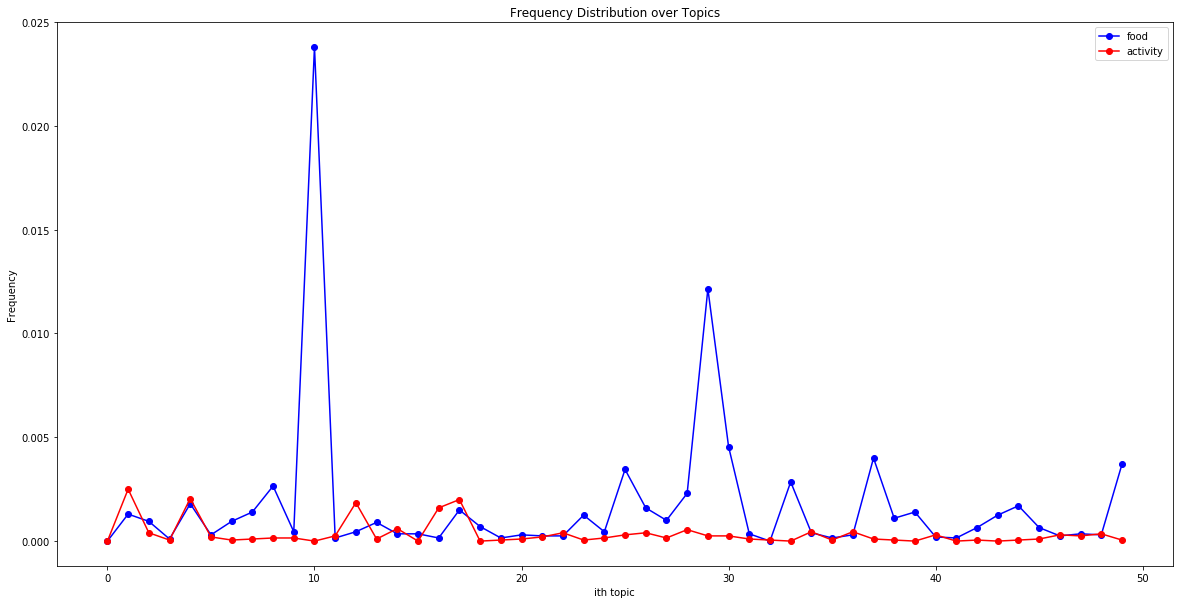

In [25]:
plt.figure(figsize=(20,10))
plt.plot(LDA50_12000[0],label = 'food',color='blue',marker = 'o')
plt.plot(LDA50_12000[1],label = 'activity',color='red',marker = 'o')
plt.title("Frequency Distribution over Topics")
plt.xlabel("ith topic")
plt.ylabel('Frequency')
plt.legend()
plt.show()

## topic 50, feature 16000

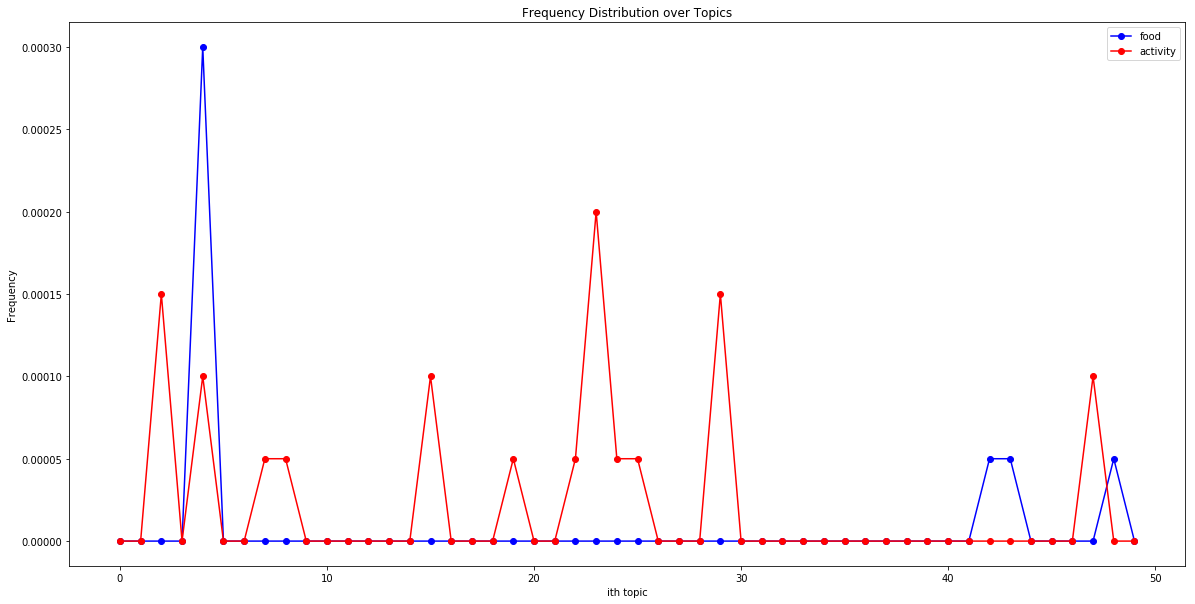

In [26]:
plt.figure(figsize=(20,10))
plt.plot(LDA50_16000[0],label = 'food',color='blue',marker = 'o')
plt.plot(LDA50_16000[1],label = 'activity',color='red',marker = 'o')
plt.title("Frequency Distribution over Topics")
plt.xlabel("ith topic")
plt.ylabel('Frequency')
plt.legend()
plt.show()

## topic 125, feature 20000

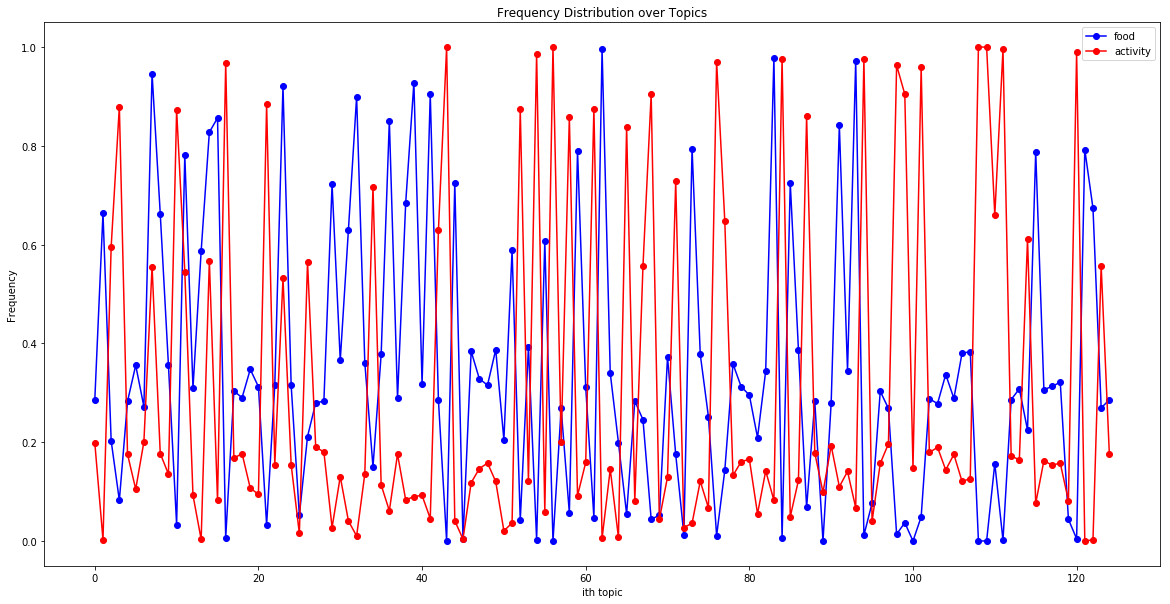

In [27]:
plt.figure(figsize=(20,10))
plt.plot(LDA125_20000[0],label = 'food',color='blue',marker = 'o')
plt.plot(LDA125_20000[1],label = 'activity',color='red',marker = 'o')
plt.title("Frequency Distribution over Topics")
plt.xlabel("ith topic")
plt.ylabel('Frequency')
plt.legend()
plt.show()

## topic 125, feature 25000

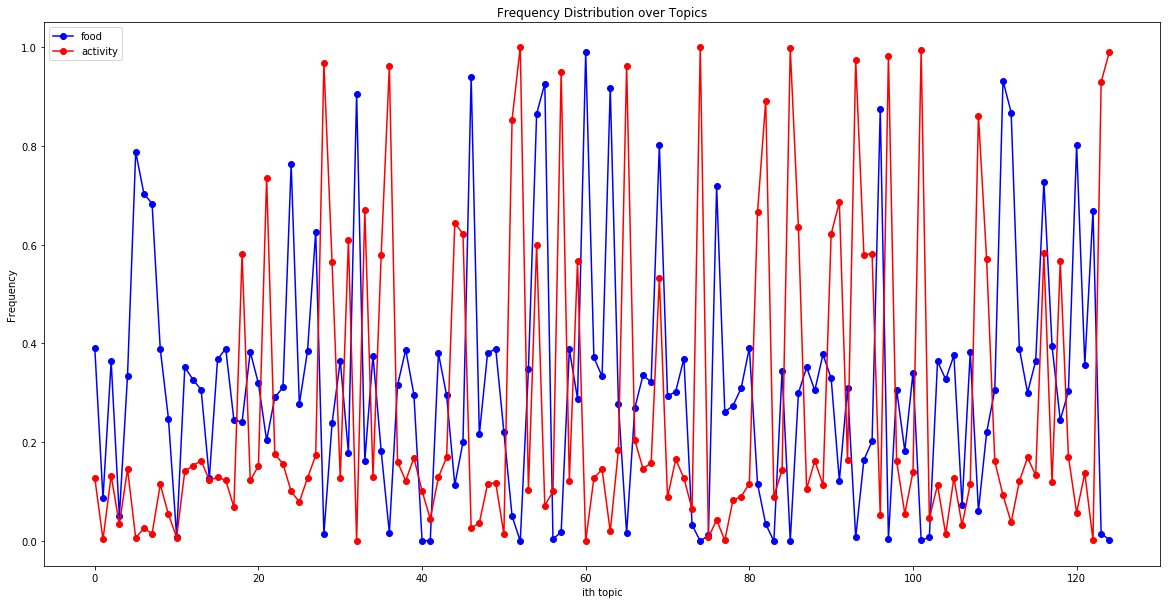

In [28]:
plt.figure(figsize=(20,10))
plt.plot(LDA125_25000[0],label = 'food',color='blue',marker = 'o')
plt.plot(LDA125_25000[1],label = 'activity',color='red',marker = 'o')
plt.title("Frequency Distribution over Topics")
plt.xlabel("ith topic")
plt.ylabel('Frequency')
plt.legend()
plt.show()